In [1]:
# I first imported the relevant libraries in python that I'll use in my analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns

In [2]:
#I then imported the data to be used in our analysis.
#I indexed our data by virtue of month and converted the months into dates which can be recognised by machine language.

debt=pd.read_excel('frank data.xls',index_col='MONTH',parse_dates=True)
debt=debt.asfreq('MS')
debt.head()

,NO.OF EMPLOYERS 2019/2020,No.of CO 2019/20,No.of Audits 2019/20,REVENUE2019/2020,TOTAL DEBT 2019/2020,NO.OF EMPLOYERS 2020/2021,No.of CO 2020/21,No.of Audits 2020/21,REVENUE2020/2021,TOTAL DEBT 2020/2021,No. of New Employers
MONTH,,,,,,,,,,,
2020-07-01,2842.0,29.0,238.0,4.600654e+08,145698018.0,4226.0,0.0,0.0,3.244203e+08,271121229.0,165.0
2020-08-01,2982.0,24.0,165.0,1.422498e+09,159532321.0,4183.0,2.0,2.0,1.446884e+09,290219607.0,140.0
2020-09-01,3016.0,24.0,200.0,7.267268e+08,169228894.0,4257.0,3.0,3.0,9.821314e+08,324771455.0,171.0
2020-10-01,3150.0,34.0,360.0,1.406029e+09,180885997.0,4336.0,6.0,6.0,1.127531e+09,324739953.0,310.0
2020-11-01,3035.0,39.0,229.0,8.588977e+08,157679690.0,4269.0,4.0,4.0,1.068581e+09,332889551.0,349.0


In [3]:
debt.describe()
# The above gives us the basic infomation of our data such as mean,minimum value ,maximum value,our quartiles,
#the standard deviation from the mean and the number of values in our data(count)

#i.e the mean debt in the year 2019/2020 is 175.3 million

,NO.OF EMPLOYERS 2019/2020,No.of CO 2019/20,No.of Audits 2019/20,REVENUE2019/2020,TOTAL DEBT 2019/2020,NO.OF EMPLOYERS 2020/2021,No.of CO 2020/21,No.of Audits 2020/21,REVENUE2020/2021,TOTAL DEBT 2020/2021,No. of New Employers
count,10.000000,10.000000,10.000000,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000,1.000000e+01,1.000000e+01,10.000000
mean,3182.100000,24.100000,166.400000,9.554294e+08,1.753036e+08,4235.300000,3.400000,3.500000,1.014750e+09,2.857845e+08,592.500000
std,292.270214,11.415876,109.871845,4.707167e+08,1.957765e+07,179.814132,2.221111,2.321398,3.719490e+08,6.632966e+07,547.340895
min,2842.000000,2.000000,2.000000,3.398154e+08,1.456980e+08,3821.000000,0.000000,0.000000,3.244203e+08,1.645965e+08,140.000000
25%,3020.750000,23.250000,88.500000,5.267307e+08,1.619565e+08,4193.750000,2.000000,2.000000,9.067304e+08,2.758958e+08,170.250000
50%,3114.500000,24.500000,182.500000,9.057893e+08,1.755137e+08,4263.000000,3.500000,3.500000,1.098056e+09,3.188808e+08,329.500000
75%,3263.250000,32.000000,230.500000,1.365327e+09,1.839208e+08,4324.750000,4.750000,5.500000,1.170790e+09,3.273408e+08,819.250000
max,3889.000000,39.000000,360.000000,1.695435e+09,2.156331e+08,4489.000000,7.000000,7.000000,1.495650e+09,3.403877e+08,1616.000000


In [4]:
# I then proceded to find the coefficient of correlation to find out what parameters influence each other the most
debt.corr()
#We can clearly see that Revenue fro each financial year affect each other the most,having a correlation coefficient of 0.733033

,NO.OF EMPLOYERS 2019/2020,No.of CO 2019/20,No.of Audits 2019/20,REVENUE2019/2020,TOTAL DEBT 2019/2020,NO.OF EMPLOYERS 2020/2021,No.of CO 2020/21,No.of Audits 2020/21,REVENUE2020/2021,TOTAL DEBT 2020/2021,No. of New Employers
NO.OF EMPLOYERS 2019/2020,1.000000,-0.728940,-0.606876,-0.200975,0.940403,-0.639396,0.140112,0.117993,0.304089,-0.675614,0.226187
No.of CO 2019/20,-0.728940,1.000000,0.865266,-0.053025,-0.673096,0.814669,0.331284,0.320745,-0.464757,0.892413,-0.148990
No.of Audits 2019/20,-0.606876,0.865266,1.000000,-0.056813,-0.506254,0.653871,0.391288,0.364625,-0.446938,0.720969,-0.302574
REVENUE2019/2020,-0.200975,-0.053025,-0.056813,1.000000,-0.104694,0.081869,0.108699,0.103723,0.733033,-0.068114,0.286860
TOTAL DEBT 2019/2020,0.940403,-0.673096,-0.506254,-0.104694,1.000000,-0.457930,0.348789,0.348027,0.303148,-0.536418,0.297634
NO.OF EMPLOYERS 2020/2021,-0.639396,0.814669,0.653871,0.081869,-0.457930,1.000000,0.524637,0.539691,-0.462028,0.869427,0.301342
No.of CO 2020/21,0.140112,0.331284,0.391288,0.108699,0.348789,0.524637,1.000000,0.991278,-0.036329,0.343603,0.473616
No.of Audits 2020/21,0.117993,0.320745,0.364625,0.103723,0.348027,0.539691,0.991278,1.000000,-0.051895,0.359364,0.466229
REVENUE2020/2021,0.304089,-0.464757,-0.446938,0.733033,0.303148,-0.462028,-0.036329,-0.051895,1.000000,-0.401873,0.041438
TOTAL DEBT 2020/2021,-0.675614,0.892413,0.720969,-0.068114,-0.536418,0.869427,0.343603,0.359364,-0.401873,1.000000,-0.140357


In [5]:
#Graph plotting(Debt Data 2019/2020 and 2020/2021)

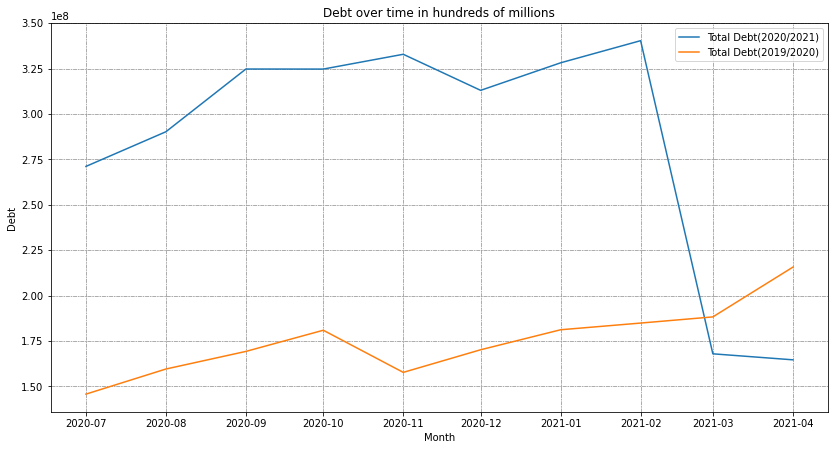

In [6]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_axes([0.0,0.0,0.9,0.9])
ax.set_xlabel('Month')
ax.set_ylabel('Debt')
ax.set_title('Debt over time in hundreds of millions')
ax.plot(debt.index,debt['TOTAL DEBT 2020/2021'],label='Total Debt(2020/2021)')
plt.plot(debt.index,debt['TOTAL DEBT 2019/2020'],label='Total Debt(2019/2020)')
plt.legend(loc=0)
plt.grid(True,color='0.6',dashes=(5,1,2,1))

In [7]:
# FORECASTING THE DEBT

In [8]:
# The data is Time Series Data.
#A Time series may contain either,a trend,seasonality or noise(random).
# Our Data has no Seasonality and since noise in time series cannot be used in forecasting,we will use the trend component.
#We shall use the holt winter model that accounts for trend but no seasonality.


In [9]:
# We begin by importing our libraries
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [10]:
# We split our data into two
train_df=debt.iloc[:7]
test_df=debt.iloc[6:]

In [11]:
# We now fit our training data to our model.
model_fit=ExponentialSmoothing(train_df['TOTAL DEBT 2020/2021'],trend='add',seasonal='add',seasonal_periods=6,freq='MS').fit()

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [12]:
predictions=model_fit.forecast(10)

In [13]:
#These are the predictions of Debt value of 2020/2021 in hundreds of millions
predictions

2021-02-01    3.150536e+08
2021-03-01    3.527279e+08
2021-04-01    3.558188e+08
2021-05-01    3.670909e+08
2021-06-01    3.503454e+08
2021-07-01    3.115693e+08
2021-08-01    3.337901e+08
2021-09-01    3.714644e+08
2021-10-01    3.745554e+08
2021-11-01    3.858274e+08
Freq: MS, dtype: float64

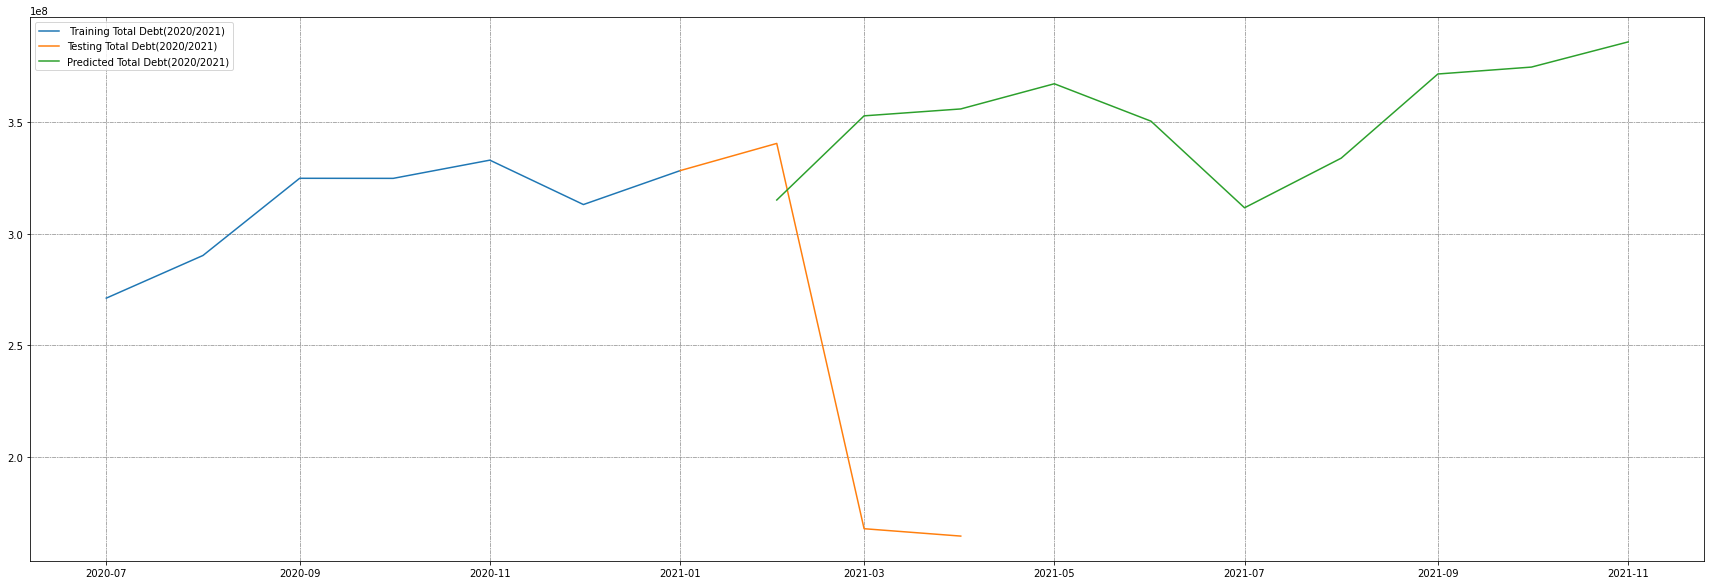

In [14]:
plt.figure(figsize=(30,10))

plt.plot(train_df['TOTAL DEBT 2020/2021'],label=' Training Total Debt(2020/2021)')
plt.plot(test_df['TOTAL DEBT 2020/2021'],label='Testing Total Debt(2020/2021)')
plt.plot(predictions,label='Predicted Total Debt(2020/2021)')
plt.legend(loc=0)
plt.grid(True,color='0.6',dashes=(5,1,2,1))

In [15]:
#Explanation 


In [16]:
#There was a sudden and significant Drop in in Debt in the period of 2021-02 and 2021-04.
#This can be attributed to the third wave of covid-19.
#Also,This period is also too brief and carries little weight in our predictions.